In [ ]:
pip install umap-learn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
%matplotlib inline
import pandas as pd
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.preprocessing import OneHotEncoder
import umap
from sklearn.manifold import TSNE
from scipy.stats.mstats import winsorize

In [ ]:
# Load the rounded data set for exploratory data analysis
df = pd.read_csv('df_rounded.csv', index_col='File_ID')
df.head()

,hsa-mir-200c,hsa-mir-145,hsa-mir-221,hsa-mir-222
File_ID,,,,
1524814b-437a-425e-9da5-f904f2208f0b.mirbase21.isoforms.quantification.txt,6121.381,11775.538,340.110,86.285
6ae0971f-cf75-4a6b-80da-c406262bce5f.mirbase21.isoforms.quantification.txt,24027.638,20693.632,442.121,171.175
25162bd0-6b90-44a6-aedb-93dbaab69b20.mirbase21.isoforms.quantification.txt,25333.854,3934.611,204.139,55.347
45d3eddf-1715-4494-b18b-201ac5b20f08.mirbase21.isoforms.quantification.txt,21537.024,3195.138,142.592,35.131
b6a5f3fa-ce69-4fff-bf3c-1e6f2a6f610f.mirbase21.isoforms.quantification.txt,12286.823,2914.530,289.975,66.353


In [ ]:
# Basic descriptive statistics to understand data distribution.
df.describe()

,hsa-mir-200c,hsa-mir-145,hsa-mir-221,hsa-mir-222
count,498.000000,498.000000,498.000000,498.000000
mean,13143.507785,5576.411484,197.217386,49.489847
std,6852.397456,3497.783495,127.002799,33.598138
min,1579.751000,405.477000,13.100000,4.608000
25%,8348.166250,3362.600750,111.098500,28.225500
50%,11641.762000,4896.416500,165.519500,42.110500
75%,16824.583000,6782.004750,246.164750,62.481750
max,60751.385000,34709.836000,842.102000,302.503000


(array([0, 1, 2, 3]),
 [Text(0, 0, 'hsa-mir-200c'),
  Text(1, 0, 'hsa-mir-145'),
  Text(2, 0, 'hsa-mir-221'),
  Text(3, 0, 'hsa-mir-222')])

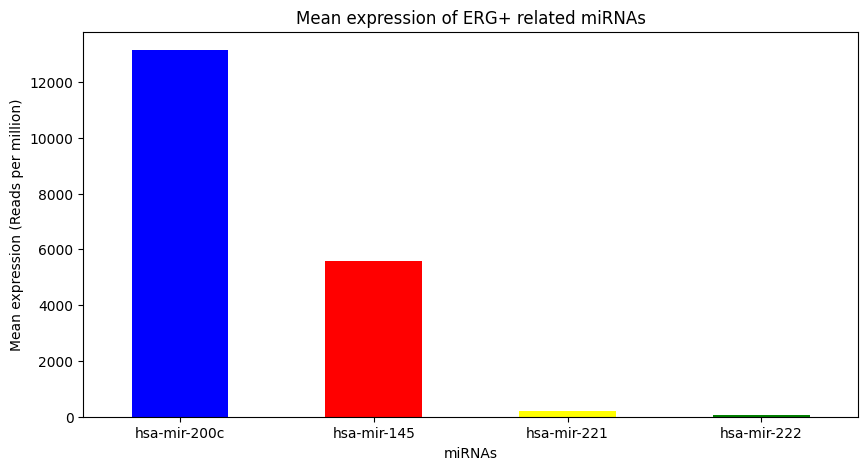

In [ ]:
df_mean = df.mean()
# Plot a bar graph grouped by stages of the mean expression of each miRNA
df_mean.plot(kind='bar', figsize=(10, 5), color=['blue', 'red', 'yellow', 'green'])
plt.title('Mean expression of ERG+ related miRNAs')
plt.ylabel('Mean expression (Reads per million)')
plt.xlabel('miRNAs')
plt.xticks(rotation=0)


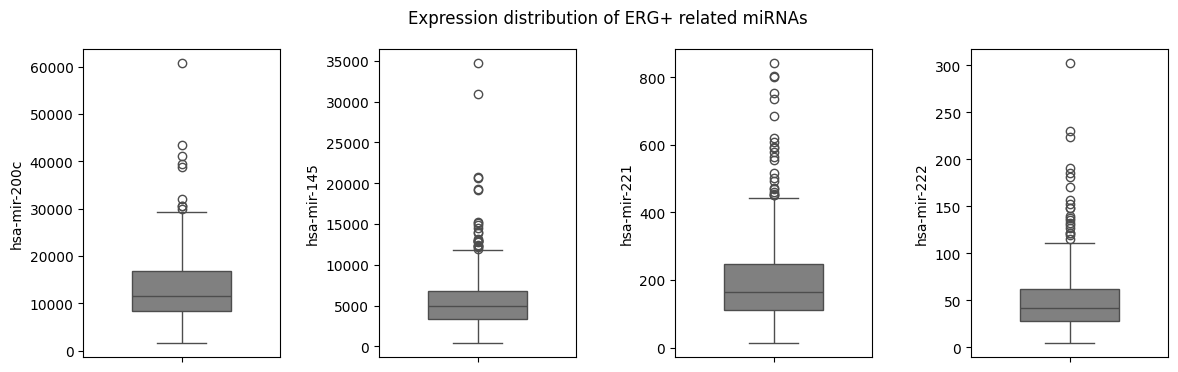

In [ ]:
# Making box sub-plots of each ERG+ related miRNA expression distribution
fig = plt.figure(figsize=(14, 4))
ax0 = fig.add_subplot(1, 4, 1)
ax1 = fig.add_subplot(1, 4, 2)
ax2 = fig.add_subplot(1, 4, 3)
ax3 = fig.add_subplot(1, 4, 4)
axes = [ax0, ax1, ax2, ax3]
# Built a loop to generate the individual plots
for i, mir in enumerate(df.columns):
  sns.boxplot(y=mir, data=df, ax=axes[i], width=1, gap=0.5, color='gray')
plt.suptitle('Expression distribution of ERG+ related miRNAs')
plt.subplots_adjust(wspace=0.5)


To evaluate what kind of relationships between features exist we use the corr() function and plot a correlation matrix. Also, we evaluate the importance of each feature with the target variable.

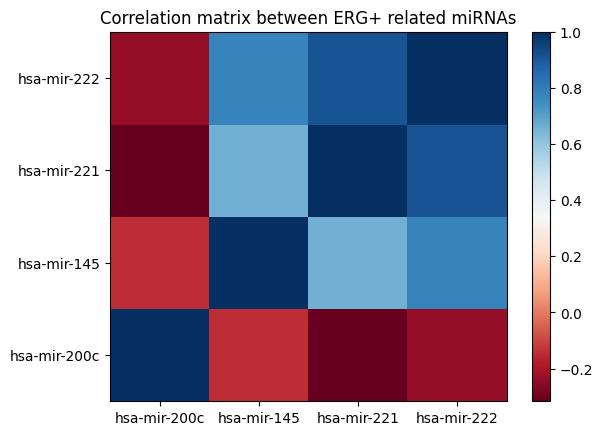

In [ ]:
# Create the correlation data frame
df_corr = df.corr()

# Plot the correlation matrix
plt.pcolor(df_corr, cmap='RdBu')
plt.title('Correlation matrix between ERG+ related miRNAs')
plt.yticks(np.arange(0.5, len(df.columns) + 0.5, 1), df.columns)
plt.xticks(np.arange(0.5, len(df.columns) + 0.5, 1), df.columns, rotation=0)
plt.colorbar()
plt.show()

In [ ]:
# The first strategy will be capping outliers. The variables distributions will be sliced between an upper limit (2% highest) and a lower limit (2% lowest)
df_columns = df.columns
for column in df_columns:
  df[column] = winsorize(df[column], limits=[0.02, 0.02])

#Principal Component Analysis (PCA): Initial Projection
To visualise potential clustering patterns and reduce the complexity of the miRNA dataset, PCA is applied using two principal components. Prior to the analysis, the selected miRNA expression features are standardised to have zero mean and unit variance. The samples are then projected onto the first two principal components and visualised in a 2D scatter plot.

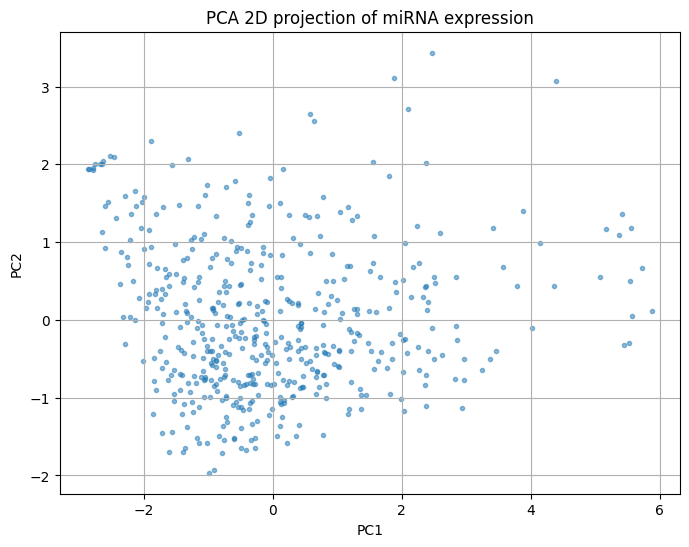

In [ ]:
X = df  # data matrix

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize and apply PCA reducing to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the projected data
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5, marker='.')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA 2D projection of miRNA expression')
plt.grid(True)
plt.show()

In [ ]:
# Percentage of variance explained by the first two components
explained_var = 100 * pca.explained_variance_ratio_.sum()
print(f"Variance explained by the first 2 PCs: {explained_var:.2f}%")

Variance explained by the first 2 PCs: 89.42%


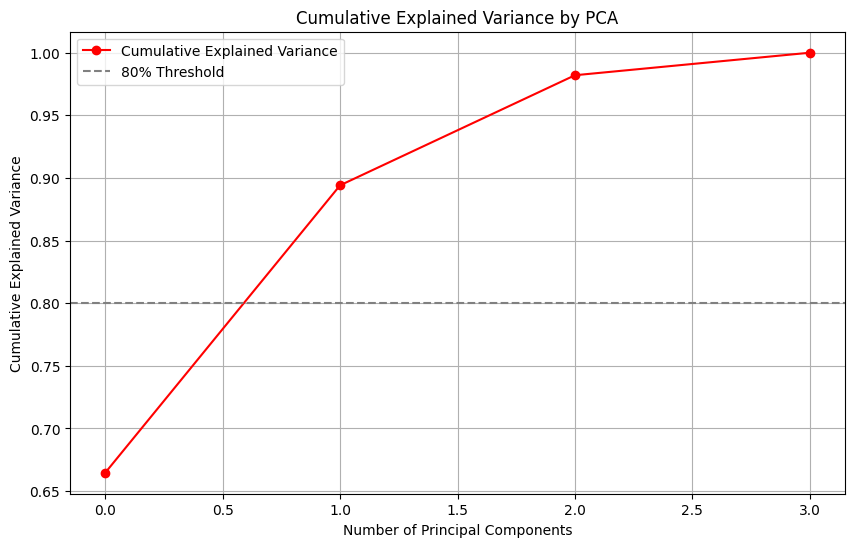

In [ ]:
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_scaled)
explained_variance_ratio = pca_full.explained_variance_ratio_

plt.figure(figsize=(10,6))
plt.plot(np.cumsum(explained_variance_ratio), marker='o', linestyle='-', color='red', label='Cumulative Explained Variance')
plt.axhline(y=0.8, color='gray', linestyle='--', label='80% Threshold')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA')
plt.grid(True)
plt.legend()
plt.show()


#PCA with Number of Components Explaining 90% Variance

PCA is recomputed with the number of components required to explain 90% of the variance, and results are saved.

In [ ]:
cum_var = np.cumsum(explained_variance_ratio)
n_components_90 = np.argmax(cum_var >= 0.9) + 1
print(f'Number of components to explain 90% of variance: {n_components_90}')

Number of components to explain 90% of variance: 3


In [ ]:
pca_90 = PCA(n_components=3)
X_pca_90 = pca_90.fit_transform(X_scaled)

# Convert to DataFrame
X_pca_df = pd.DataFrame(X_pca_90, columns=[f'PC{i+1}' for i in range(n_components_90)], index=df.index)

# Save PCA results to CSV and download
X_pca_df.to_csv('pca_results.csv', index=False)

from google.colab import files
files.download('pca_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>